In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import re
#Models
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from math import sqrt

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
%matplotlib inline


In [ ]:
train= pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23


In [ ]:
test.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location
0,fffe3400310033003300,James Miller,0.35,53.0,18.0,871.0,Wood,5.98,19.11,Yes,Yes,No,Airways,No,Working Class,No,07/03/17,07/06/17,"Santoshaven, IA 63481"
1,fffe3600350035003400,Karen Vetrano,0.67,7.0,4.0,108.0,Clay,6.92,13.96,No,No,No,Roadways,Yes,Working Class,No,05/02/16,05/02/16,"Ericksonton, OH 98253"
2,fffe3700360030003500,Roseanne Gaona,0.61,6.0,5.0,97.0,Aluminium,4.23,13.62,Yes,No,No,Airways,No,Working Class,No,01/04/18,01/06/18,APO AP 83453
3,fffe350038003600,Todd Almanza,0.14,15.0,8.0,757.0,Clay,6.28,23.79,No,Yes,No,Roadways,Yes,Wealthy,No,09/14/17,09/17/17,"Antonioborough, AL 54778"
4,fffe3500390032003500,Francis Rivero,0.63,10.0,4.0,1673.0,Marble,4.39,17.83,No,Yes,Yes,Roadways,No,Working Class,Yes,12/03/17,12/02/17,"Lake Frances, LA 03040"


In [ ]:
test_id = pd.DataFrame()
test_id['Customer Id'] = test['Customer Id']

In [ ]:
train.describe()

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost
count,5750.000000,6125.000000,5916.000000,5.913000e+03,6500.00000,6500.000000,6.500000e+03
mean,0.461850,21.766204,9.617647,4.006948e+05,1192.42009,37.407174,1.713920e+04
std,0.265781,11.968192,5.417000,2.678081e+06,8819.61675,26.873519,2.406579e+05
min,0.000000,3.000000,2.000000,3.000000e+00,3.00000,10.000000,-8.801727e+05
25%,0.240000,12.000000,6.000000,5.030000e+02,5.23000,16.700000,1.884400e+02
50%,0.450000,20.000000,8.000000,3.102000e+03,8.02500,23.505000,3.820650e+02
75%,0.680000,30.000000,12.000000,3.645600e+04,89.47000,57.905000,1.156115e+03
max,1.000000,73.000000,50.000000,1.179279e+08,382385.67000,99.980000,1.114343e+07


In [ ]:
test.describe()

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price
count,3278.000000,3381.000000,3359.000000,3.351000e+03,3500.000000,3500.000000
mean,0.463279,21.275067,9.371837,3.749665e+05,1059.608646,36.352909
std,0.272287,11.689805,5.231695,2.517256e+06,7409.348267,26.299318
min,0.000000,3.000000,2.000000,4.000000e+00,3.000000,10.000000
25%,0.230000,12.000000,6.000000,4.895000e+02,5.160000,16.870000
50%,0.450000,20.000000,8.000000,2.929000e+03,7.120000,23.055000
75%,0.680000,29.000000,12.000000,3.340650e+04,81.195000,55.742500
max,1.000000,65.000000,48.000000,6.459500e+07,227254.240000,99.980000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Id            6500 non-null   object 
 1   Artist Name            6500 non-null   object 
 2   Artist Reputation      5750 non-null   float64
 3   Height                 6125 non-null   float64
 4   Width                  5916 non-null   float64
 5   Weight                 5913 non-null   float64
 6   Material               5736 non-null   object 
 7   Price Of Sculpture     6500 non-null   float64
 8   Base Shipping Price    6500 non-null   float64
 9   International          6500 non-null   object 
 10  Express Shipment       6500 non-null   object 
 11  Installation Included  6500 non-null   object 
 12  Transport              5108 non-null   object 
 13  Fragile                6500 non-null   object 
 14  Customer Information   6500 non-null   object 
 15  Remo

In [ ]:
train.isna().sum()

Customer Id                 0
Artist Name                 0
Artist Reputation         750
Height                    375
Width                     584
Weight                    587
Material                  764
Price Of Sculpture          0
Base Shipping Price         0
International               0
Express Shipment            0
Installation Included       0
Transport                1392
Fragile                     0
Customer Information        0
Remote Location           771
Scheduled Date              0
Delivery Date               0
Customer Location           0
Cost                        0
dtype: int64

In [ ]:
test.isna().sum()

Customer Id                0
Artist Name                0
Artist Reputation        222
Height                   119
Width                    141
Weight                   149
Material                   0
Price Of Sculpture         0
Base Shipping Price        0
International              0
Express Shipment           0
Installation Included      0
Transport                232
Fragile                    0
Customer Information       0
Remote Location            0
Scheduled Date             0
Delivery Date              0
Customer Location          0
dtype: int64

In [ ]:
train['Transport'].nunique()

3

In [ ]:
train['Transport'].unique()

array(['Airways', 'Roadways', nan, 'Waterways'], dtype=object)

In [ ]:
#Train Values
train['Height'].fillna(train['Height'].mean(), inplace = True)
train['Width'].fillna(train['Width'].mean(), inplace = True)
train['Weight'].fillna(train['Weight'].mean(), inplace = True)
train['Artist Reputation'].fillna(train['Artist Reputation'].mean(), inplace = True)

In [ ]:
#Test Values
test['Height'].fillna(test['Height'].mean(), inplace = True)
test['Width'].fillna(test['Width'].mean(), inplace = True)
test['Weight'].fillna(test['Weight'].mean(), inplace = True)
test['Artist Reputation'].fillna(test['Artist Reputation'].mean(), inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


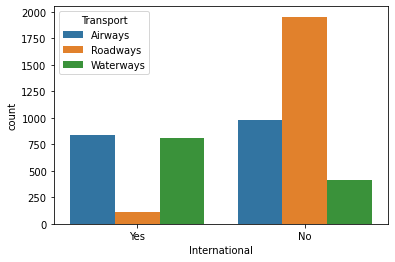

In [ ]:
sns.countplot(train['International'], hue = train['Transport'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


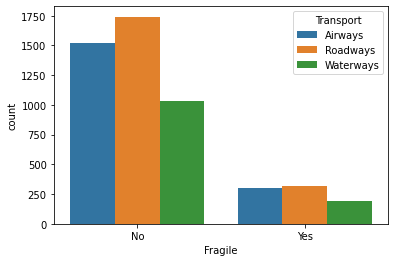

In [ ]:
sns.countplot('Fragile', hue = 'Transport', data = train)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


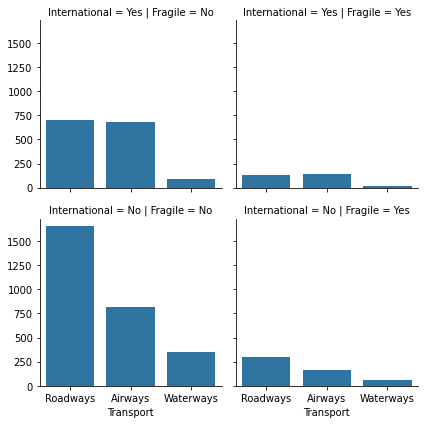

In [ ]:
grid = sns.FacetGrid(row = 'International', col = 'Fragile' , data=train)
grid.map(sns.countplot, 'Transport')

In [ ]:
def impute_transport(cols):
  International = cols[0]
  Transport = cols[1]

  if pd.isnull(Transport):
    if International == 'No':
      return 'Roadways'
    elif International == 'Yes':
      return 'Airways'
    else:
      return 'Waterways'
  else:
    return Transport

In [ ]:
#Train Data
train['Transport'] = train[['International', 'Transport']].apply(impute_transport, axis =1 )

In [ ]:
#Test Data
test['Transport'] = test[['International', 'Transport']].apply(impute_transport, axis =1 )

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


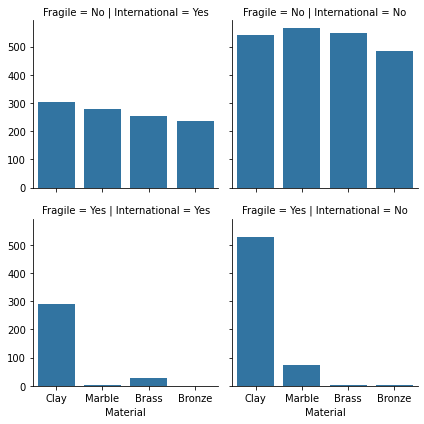

In [ ]:
grid = sns.FacetGrid(row = 'Fragile', col = 'International' , data=train)
grid.map(sns.countplot, 'Material')

In [ ]:
def impute_material(cols):
  Fragile = cols[0]
  Material = cols[1]

  if pd.isnull(Material):
    if Fragile == 'Yes':
      return 'Clay'
    else:
      return 'Brass'
  else:
    return Material

In [ ]:
#Train Data
train['Material'] = train[['Fragile', 'Material']].apply(impute_material, axis =1 )
#Test Data
test['Material'] = test[['Fragile', 'Material']].apply(impute_material, axis =1 )

#Feature Engineering

In [ ]:
train['Cost'] = train['Cost'].abs()

In [ ]:
def text_process(text):
  text = [word for word in text]
  text = text[-8:]
  text = ''.join(text)
  return(text)

In [ ]:
train['Location'] = train['Customer Location'].apply(text_process)
test['Location'] = test['Customer Location'].apply(text_process)

In [ ]:
 for text in train:
  train['State'] = train['Location'].str.partition(' ')[0]
  train['Postal Code'] = train['Location'].str.partition(' ')[2]
  
train.drop(['Location'],axis =1, inplace = True)

In [ ]:
 for text in test:
  test['State'] = test['Location'].str.partition(' ')[0]
  test['Postal Code'] = test['Location'].str.partition(' ')[2]
  
test.drop(['Location'],axis =1, inplace = True)

In [ ]:
#Train
train['Scheduled Date'] = pd.to_datetime(train['Scheduled Date'])
train['Delivery Date'] = pd.to_datetime(train['Delivery Date'])
train['Days To Deliver'] = (train['Scheduled Date'] - train['Delivery Date']).map(lambda x:str(x).split()[0])

#Test
test['Scheduled Date'] = pd.to_datetime(test['Scheduled Date'])
test['Delivery Date'] = pd.to_datetime(test['Delivery Date'])
test['Days To Deliver'] = (test['Scheduled Date'] - test['Delivery Date']).map(lambda x:str(x).split()[0])

In [ ]:
train['Days To Deliver'] = pd.to_numeric(train['Days To Deliver'])
test['Days To Deliver'] = pd.to_numeric(test['Days To Deliver'])
train['Days To Deliver'] = abs(train['Days To Deliver'])
test['Days To Deliver'] = abs(test['Days To Deliver'])

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


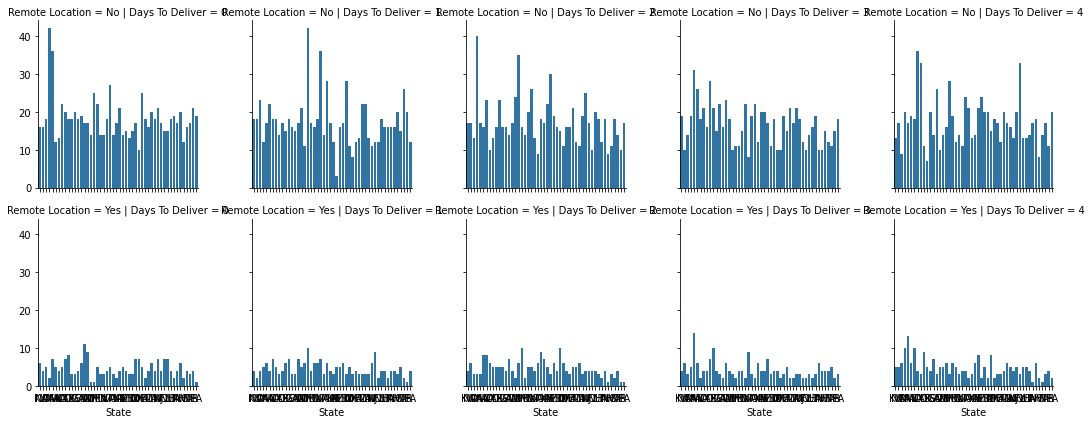

In [ ]:
grid = sns.FacetGrid(row = 'Remote Location', col = 'Days To Deliver' , data=train)
grid.map(sns.countplot, 'State')

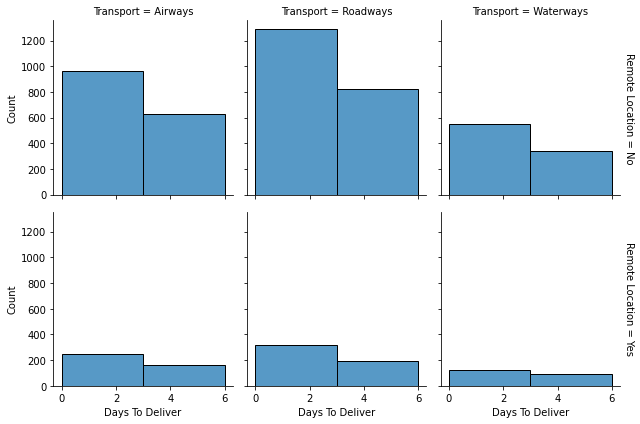

In [ ]:
sns.displot(
    train, x="Days To Deliver", row="Remote Location", col = 'Transport',
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

In [ ]:
train['State'].nunique()

54

In [ ]:
train.groupby(['State', 'Remote Location'])['Remote Location'].count()

State  Remote Location
AA     No                 168
       Yes                 45
AE     No                 154
       Yes                 34
AK     No                  82
                         ... 
WI     Yes                 22
WV     No                  82
       Yes                 23
WY     No                  72
       Yes                 22
Name: Remote Location, Length: 108, dtype: int64

In [ ]:
train['Remote Location'] = train['Remote Location'].fillna(train['Remote Location'].mode()[0])
test['Remote Location'] = test['Remote Location'].fillna(test['Remote Location'].mode()[0])

In [ ]:
#Remove unnecessary columns
train.drop(columns = ['Customer Id','Artist Name', 'Scheduled Date', 'Delivery Date', 'Customer Location', 'Postal Code'], axis=1 , inplace = True)
test.drop(columns = ['Customer Id','Artist Name', 'Scheduled Date', 'Delivery Date', 'Customer Location', 'Postal Code'],axis =1, inplace = True)

# Label Encoding, Feature Scaling and Training Model

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
train.head()

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Cost,State,Days To Deliver
0,0.26,17.0,6.000000,4128.000000,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,283.29,OH,4
1,0.28,3.0,3.000000,61.000000,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,159.96,WY,1
2,0.07,8.0,5.000000,237.000000,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,154.29,WA,1
3,0.12,9.0,9.617647,400694.821918,Aluminium,5.81,16.31,No,No,No,Roadways,No,Wealthy,Yes,161.16,KY,4
4,0.15,17.0,6.000000,324.000000,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,159.23,PA,4


In [ ]:
cat_cols = ['Material','International','Express Shipment', 'Installation Included', 'Transport', 'Fragile','Customer Information', 'Remote Location', 'State']

In [ ]:
le = LabelEncoder()
train[cat_cols].apply(le.fit)

Material                 LabelEncoder()
International            LabelEncoder()
Express Shipment         LabelEncoder()
Installation Included    LabelEncoder()
Transport                LabelEncoder()
Fragile                  LabelEncoder()
Customer Information     LabelEncoder()
Remote Location          LabelEncoder()
State                    LabelEncoder()
dtype: object

In [ ]:
le.fit(train['Material'])
train['Material'] = le.transform(train['Material'])
test['Material'] = le.transform(test['Material'])

In [ ]:
le.fit(train['International'])
train['International']= le.transform(train['International'])
test['International']= le.transform(test['International'])

In [ ]:
le.fit(train['Express Shipment'])
train['Express Shipment']= le.transform(train['Express Shipment'])
test['Express Shipment']= le.transform(test['Express Shipment'])

In [ ]:
le.fit(train['Installation Included'])
train['Installation Included']= le.transform(train['Installation Included'])
test['Installation Included']= le.transform(test['Installation Included'])

In [ ]:
le.fit(train['Transport'])
train['Transport']= le.transform(train['Transport'])
test['Transport'] = le.transform(test['Transport'])

In [ ]:
le.fit(train['Fragile'])
train['Fragile']= le.transform(train['Fragile'])
test['Fragile']= le.transform(test['Fragile'])

In [ ]:
le.fit(train['Customer Information'])
train['Customer Information']= le.transform(train['Customer Information'])
test['Customer Information']= le.transform(test['Customer Information'])

In [ ]:
le.fit(train['Remote Location'])
train['Remote Location']= le.transform(train['Remote Location'])
test['Remote Location']= le.transform(test['Remote Location'])

In [ ]:
le.fit(train['State'])
train['State']= le.transform(train['State'])
test['State']= le.transform(test['State'])

In [ ]:
train.head()

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Cost,State,Days To Deliver
0,0.26,17.0,6.000000,4128.000000,1,13.91,16.27,1,1,0,0,0,1,0,283.29,38,4
1,0.28,3.0,3.000000,61.000000,1,6.83,15.00,0,0,0,1,0,1,0,159.96,53,1
2,0.07,8.0,5.000000,237.000000,3,4.96,21.18,0,0,0,1,1,1,1,154.29,50,1
3,0.12,9.0,9.617647,400694.821918,0,5.81,16.31,0,0,0,1,0,0,1,161.16,20,4
4,0.15,17.0,6.000000,324.000000,0,3.18,11.94,1,1,1,0,0,1,0,159.23,41,4


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Artist Reputation      6500 non-null   float64
 1   Height                 6500 non-null   float64
 2   Width                  6500 non-null   float64
 3   Weight                 6500 non-null   float64
 4   Material               6500 non-null   int64  
 5   Price Of Sculpture     6500 non-null   float64
 6   Base Shipping Price    6500 non-null   float64
 7   International          6500 non-null   int64  
 8   Express Shipment       6500 non-null   int64  
 9   Installation Included  6500 non-null   int64  
 10  Transport              6500 non-null   int64  
 11  Fragile                6500 non-null   int64  
 12  Customer Information   6500 non-null   int64  
 13  Remote Location        6500 non-null   int64  
 14  Cost                   6500 non-null   float64
 15  Stat

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [ ]:
X = train.drop('Cost', axis=1)
y = train['Cost']


In [ ]:
X =ss.fit_transform(X)

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
tree_predict = tree.predict(X_test)
tree_predict


array([ 589.58,  177.14,  445.46, ..., 4869.97, 1891.75,  180.93])

In [ ]:
from sklearn.metrics import mean_squared_error
score = np.sqrt(mean_squared_error(y_test, tree_predict))
score

396454.6544667014

In [ ]:
average = sum(train['Cost'])/ len(train['Cost']) 

In [ ]:
average

18839.8275846154

# For Train And test Data

In [ ]:
train_X = train.drop('Cost', axis=1)
train_y = train['Cost']
test_X = test.copy()

In [ ]:
train_X

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,State,Days To Deliver
0,0.26,17.0,6.000000,4.128000e+03,1,13.91,16.27,1,1,0,0,0,1,0,38,4
1,0.28,3.0,3.000000,6.100000e+01,1,6.83,15.00,0,0,0,1,0,1,0,53,1
2,0.07,8.0,5.000000,2.370000e+02,3,4.96,21.18,0,0,0,1,1,1,1,50,1
3,0.12,9.0,9.617647,4.006948e+05,0,5.81,16.31,0,0,0,1,0,0,1,20,4
4,0.15,17.0,6.000000,3.240000e+02,0,3.18,11.94,1,1,1,0,0,1,0,41,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,0.37,37.0,10.000000,1.655100e+04,1,28.28,38.46,1,1,0,0,0,0,1,49,3
6496,0.67,15.0,9.617647,1.898100e+04,1,67.18,27.72,0,0,0,1,0,1,0,48,2
6497,0.68,19.0,8.000000,5.870000e+02,3,6.92,10.38,1,0,0,0,1,0,0,22,1
6498,0.02,33.0,9.000000,1.269377e+06,5,2929.13,69.76,0,1,0,1,0,1,1,47,2


In [ ]:
test_X

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,State,Days To Deliver
0,0.350000,53.0,18.0,871.000000,6,5.98,19.11,1,1,0,0,0,1,0,15,3
1,0.670000,7.0,4.0,108.000000,3,6.92,13.96,0,0,0,1,1,1,0,38,0
2,0.610000,6.0,5.0,97.000000,0,4.23,13.62,1,0,0,0,0,1,0,4,2
3,0.140000,15.0,8.0,757.000000,3,6.28,23.79,0,1,0,1,1,0,0,3,3
4,0.630000,10.0,4.0,1673.000000,4,4.39,17.83,0,1,1,1,0,1,1,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,0.360000,13.0,6.0,23511.000000,4,78.01,88.70,0,1,0,0,0,0,0,15,0
3496,0.720000,29.0,14.0,374966.487616,2,214.85,80.28,1,1,0,0,0,0,0,32,4
3497,0.590000,12.0,6.0,374966.487616,1,8.91,19.58,0,0,1,0,0,1,0,3,1
3498,0.463279,17.0,9.0,565.000000,0,6.75,10.89,0,1,1,0,0,0,0,47,0


In [ ]:
train_y

0        283.29
1        159.96
2        154.29
3        161.16
4        159.23
         ...   
6495     872.43
6496    1347.02
6497     354.55
6498    5037.50
6499     722.47
Name: Cost, Length: 6500, dtype: float64

In [ ]:

train_X = pd.DataFrame(ss.fit_transform(train_X), columns=train_X.columns)
test_X = pd.DataFrame(ss.transform(test_X), columns=test_X.columns)

In [ ]:
train_X

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,State,Days To Deliver
0,-0.807544,-0.410283,-0.700078,-1.552680e-01,-0.894137,-0.133634,-0.786603,1.395174,1.429859,-0.812316,-1.175012,-0.436186,0.594408,-0.459953,0.810525,1.425396
1,-0.727530,-1.615426,-1.280631,-1.568604e-01,-0.894137,-0.134437,-0.833865,-0.716757,-0.699370,-0.812316,0.223044,-0.436186,0.594408,-0.459953,1.735868,-0.677276
2,-1.567677,-1.185017,-0.893596,-1.567915e-01,0.119712,-0.134649,-0.603882,-0.716757,-0.699370,-0.812316,0.223044,2.292600,0.594408,2.174137,1.550799,-0.677276
3,-1.367642,-1.098936,0.000000,-2.279008e-17,-1.401062,-0.134552,-0.785115,-0.716757,-0.699370,-0.812316,0.223044,-0.436186,-1.682346,2.174137,-0.299887,1.425396
4,-1.247621,-0.410283,-0.700078,-1.567574e-01,-1.401062,-0.134851,-0.947741,1.395174,1.429859,1.231048,-1.175012,-0.436186,0.594408,-0.459953,0.995593,1.425396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,-0.367466,1.311350,0.073992,-1.504041e-01,-0.894137,-0.132005,0.039180,1.395174,1.429859,-0.812316,-1.175012,-0.436186,-1.682346,2.174137,1.489110,0.724505
6496,0.832745,-0.582446,0.000000,-1.494526e-01,-0.894137,-0.127594,-0.360501,-0.716757,-0.699370,-0.812316,0.223044,-0.436186,0.594408,-0.459953,1.427420,0.023615
6497,0.872752,-0.238119,-0.313043,-1.566545e-01,0.119712,-0.134427,-1.005795,1.395174,-0.699370,-0.812316,-1.175012,2.292600,-1.682346,-0.459953,-0.176508,-0.677276
6498,-1.767713,0.967024,-0.119526,3.401157e-01,1.133562,0.196930,1.203985,-0.716757,1.429859,-0.812316,0.223044,-0.436186,0.594408,2.174137,1.365731,0.023615


In [ ]:
test_X

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,State,Days To Deliver
0,-0.447480,2.688656,1.622133,-0.156543,1.640487,-0.134533,-0.680915,1.395174,1.429859,-0.812316,-1.175012,-0.436186,0.594408,-0.459953,-0.608335,0.724505
1,0.832745,-1.271099,-1.087114,-0.156842,0.119712,-0.134427,-0.872568,-0.716757,-0.699370,-0.812316,0.223044,2.292600,0.594408,-0.459953,0.810525,-1.378166
2,0.592703,-1.357181,-0.893596,-0.156846,-1.401062,-0.134732,-0.885221,1.395174,-0.699370,-0.812316,-1.175012,-0.436186,0.594408,-0.459953,-1.286920,0.023615
3,-1.287628,-0.582446,-0.313043,-0.156588,0.119712,-0.134499,-0.506752,-0.716757,1.429859,-0.812316,0.223044,2.292600,-1.682346,-0.459953,-1.348610,0.724505
4,0.672717,-1.012854,-1.087114,-0.156229,0.626637,-0.134714,-0.728549,-0.716757,1.429859,1.231048,0.223044,-0.436186,0.594408,2.174137,-0.238198,-0.677276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,-0.407473,-0.754609,-0.700078,-0.147679,0.626637,-0.126366,1.908822,-0.716757,1.429859,-0.812316,-1.175012,-0.436186,-1.682346,-0.459953,-0.608335,-1.378166
3496,1.032780,0.622697,0.848062,-0.010073,-0.387213,-0.110849,1.595479,1.395174,1.429859,-0.812316,-1.175012,-0.436186,-1.682346,-0.459953,0.440387,1.425396
3497,0.512688,-0.840691,-0.700078,-0.010073,-0.894137,-0.134201,-0.663424,-0.716757,-0.699370,1.231048,-1.175012,-0.436186,0.594408,-0.459953,-1.348610,-0.677276
3498,0.005717,-0.410283,-0.119526,-0.156663,-1.401062,-0.134446,-0.986816,-0.716757,1.429859,1.231048,-1.175012,-0.436186,-1.682346,-0.459953,1.365731,-1.378166


### Decision Tree

In [ ]:
tree = DecisionTreeRegressor()
tree.fit(train_X, train_y)
tree_predict = tree.predict(test_X)
tree_predict

array([3.0294000e+02, 3.9127000e+02, 2.4789000e+02, ..., 2.0614500e+03,
       1.2568000e+02, 3.5914516e+05])

### Gradient Boosting

In [ ]:
GBR = GradientBoostingRegressor(n_estimators= 4000, criterion= 'mse', verbose= 1, max_depth= 10 )
cv_sets = KFold(n_splits=10, shuffle= True,random_state=100)
params = {'learning_rate' : [0.05,0.06]}
grid = GridSearchCV(GBR,param_grid=params,cv=cv_sets)



In [ ]:
grid = grid.fit(train_X, train_y)

      Iter       Train Loss   Remaining Time 
         1 55798935302.1660            2.28m
         2 50364500472.2883            2.19m
         3 45459467235.3879            2.15m
         4 41035862943.0617            2.17m
         5 37039893666.1805            2.14m
         6 33433199319.5540            2.13m
         7 30176671665.5419            2.14m
         8 27238038546.4309            2.17m
         9 24585429926.2691            2.23m
        10 22191799297.2077            2.21m
        20  7970880770.0954            2.18m
        30  2864902179.6580            2.14m
        40  1030308278.3248            2.12m
        50   370910775.1796            2.11m
        60   133802373.5778            2.10m
        70    48534933.0701            2.10m
        80    17738764.0685            2.09m
        90     6570550.8294            2.08m
       100     2455566.2223            2.07m
       200       16314.1186            1.98m
       300        2728.6806            1.92m
       40

In [ ]:
grid_params = grid.best_estimator_

In [ ]:
grid_params

In [ ]:

Gbr = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mse', init=None,
                          learning_rate=0.05, loss='ls', max_depth=10,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=4000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=1, warm_start=False)
Gbr.fit(train_X, train_y)
gbr = Gbr.predict(test_X)


In [ ]:
gbr

### Random Forest

In [ ]:
forest = RandomForestRegressor(bootstrap= True, n_estimators= 4000)
forest.fit(train_X, train_y)
forest_predict = forest.predict(test_X)

In [ ]:
forest_predict

### XG Boosting

In [ ]:
xgbregressor = xgb.XGBRegressor(max_depth = 10, n_estimators= 4000)#, verbosity= 1)#, max_depth= 10, )
cv_sets = KFold(n_splits=20, shuffle= True,random_state=100)
params = {'learning_rate' : [0.01, 0.05]}

#xgbregressor.fit(train_X, train_y)
#y_pred_xgb = xgbregressor.predict(test_X)
#y_pred_xgb

In [ ]:
print(xgbregressor.learning_rate)

In [ ]:
grid_xgb = GridSearchCV(xgbregressor,cv=cv_sets,param_grid=params)

In [ ]:
grid_xgb = grid_xgb.fit(train_X, train_y)

In [ ]:
grid_params_xgb = grid_xgb.best_estimator_

grid_params_xgb

In [ ]:
grid_params_xgb.fit(train_X,train_y)

In [ ]:
y_predicted_grid_xgb = grid_params_xgb.predict(test_X)

In [ ]:
y_predicted_grid_xgb

### Neural Nets

In [ ]:
#Neural nets
import tensorflow as tf
from tensorflow import keras
from keras.layers import LeakyReLU
from keras.layers import Dense



In [ ]:
train_X.shape

In [ ]:
test_X

In [ ]:
#layer = tf.keras.layers.LeakyReLU()


model = keras.models.Sequential([
    
     keras.layers.Dense(17,input_dim=16, activation= 'elu', kernel_initializer= 'random_uniform', kernel_regularizer=tf.keras.regularizers.L2(0.01)),
     
     keras.layers.Dense(500, activation='elu'),
     
     keras.layers.Dense(300, activation='elu'),
     keras.layers.Dense(20, activation='elu'),
     
     keras.layers.Dense(1)
 ])

In [ ]:
loss_func = keras.losses.Huber()

optimizer = keras.optimizers.Nadam(learning_rate= 0.05)

model.compile(loss=loss_func, optimizer=optimizer, metrics=['mse','mae'] )
model.summary()
#optimizer = 'nadam'

In [ ]:
his = model.fit(train_X, train_y, epochs= 150, verbose =1, shuffle= True, batch_size= 25 )

In [ ]:
a = model.predict(test_X)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(his.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
df = pd.DataFrame()
df['Customer Id'] = test_id['Customer Id']
df['Cost'] = a
df['Cost'] = df['Cost'].abs()

In [ ]:
df

In [ ]:
filename = 'Cost Prediction neural.csv'

df.to_csv(filename,index=False)

print('Saved file: ' + filename)